In [203]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [4]:
df = pd.read_csv('heart.csv')

In [5]:
df.head(10)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   age                                    303 non-null    int64  
 1   sex                                    303 non-null    object 
 2   chest pain                             303 non-null    object 
 3   BP                                     303 non-null    int64  
 4   cholestoral                            303 non-null    int64  
 5   fasting blood sugar                    303 non-null    object 
 6   resting electrocardiographic           303 non-null    object 
 7   maximum heart rate                     303 non-null    int64  
 8   exercise induced angina                303 non-null    object 
 9   ST depression induced by exercise      303 non-null    float64
 10  slope of the peak exercise ST segment  303 non-null    object 
 11  number

In [6]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [7]:
df.rename(columns={'cp':'chest pain','trtbps':'BP ','chol':'cholestoral','fbs':'fasting blood sugar','restecg':'resting electrocardiographic','thalachh':'maximum heart rate',
                   'exng':'exercise induced angina','oldpeak':'previous peak','slp':'slope','caa':'number of major vessels (0-3)','thall':'thalassemia','output':'target'},inplace=True)

In [8]:
df.head(10)

,age,sex,chest pain,BP,cholestoral,fasting blood sugar,resting electrocardiographic,maximum heart rate,exercise induced angina,previous peak,slope,number of major vessels (0-3),thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [9]:
df['sex'] = df['sex'].replace({1:'male',0:'female'})

In [15]:
df.head(10)

,age,sex,chest pain,BP,cholestoral,fasting blood sugar,resting electrocardiographic,maximum heart rate,exercise induced angina,previous peak,slope,number of major vessels (0-3),thalassemia,target
0,63,male,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,male,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,female,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,male,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,female,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,male,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,female,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,male,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,male,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,male,2,150,168,0,1,174,0,1.6,2,0,2,1


In [16]:
df['chest pain'] = df['chest pain'].replace({0:'asymptomatic',1:'atypical angina',2:'non-anginal pain',3:'typical angina'})

In [20]:
df['fasting blood sugar'] = df['fasting blood sugar'].replace({1:'yes',0:'no'})

In [22]:
df['resting electrocardiographic'] = df['resting electrocardiographic'].replace({0:'left ventricular hypertrophy',1:'normal',2:'having ST-T wave abnormality'})

In [27]:
df['exercise induced angina'] = df['exercise induced angina'].replace({0:'no',1:'yes'})

In [35]:
df.rename(columns = {'previous peak':'ST depression induced by exercise','slope':'slope of the peak exercise ST segment'},inplace=True)

In [37]:
df['slope of the peak exercise ST segment'] = df['slope of the peak exercise ST segment'].replace({0:'downsloping',1:'flat',2:'upsloping'})

In [94]:
df['target'] = df['target'].replace({'no':1,'yes':0})

In [187]:
df.head(10)

,age,sex,chest pain,BP,cholestoral,fasting blood sugar,resting electrocardiographic,maximum heart rate,exercise induced angina,ST depression induced by exercise,slope of the peak exercise ST segment,number of major vessels (0-3),thalassemia,target
0,63,male,typical angina,145,233,yes,left ventricular hypertrophy,150,no,2.3,downsloping,0,1,1
1,37,male,non-anginal pain,130,250,no,normal,187,no,3.5,downsloping,0,2,1
2,41,female,atypical angina,130,204,no,left ventricular hypertrophy,172,no,1.4,upsloping,0,2,1
3,56,male,atypical angina,120,236,no,normal,178,no,0.8,upsloping,0,2,1
4,57,female,asymptomatic,120,354,no,normal,163,yes,0.6,upsloping,0,2,1
5,57,male,asymptomatic,140,192,no,normal,148,no,0.4,flat,0,1,1
6,56,female,atypical angina,140,294,no,left ventricular hypertrophy,153,no,1.3,flat,0,2,1
7,44,male,atypical angina,120,263,no,normal,173,no,0.0,upsloping,0,3,1
8,52,male,non-anginal pain,172,199,yes,normal,162,no,0.5,upsloping,0,3,1
9,57,male,non-anginal pain,150,168,no,normal,174,no,1.6,upsloping,0,2,1


Text(0.5, 1.0, 'target vs sex')

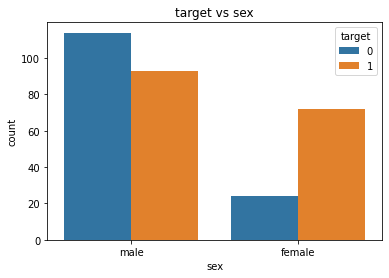

In [225]:
sns.countplot(x='sex',data=df,hue='target')
plt.title('target vs sex')

Text(0.5, 1.0, 'Chestpain vs age')

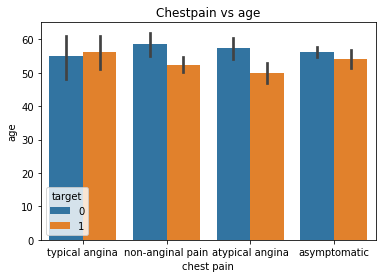

In [226]:
sns.barplot(x='chest pain',y='age',data=df,hue='target')
plt.title('Chestpain vs age')

Text(0.5, 1.0, 'thalassemia vs target count')

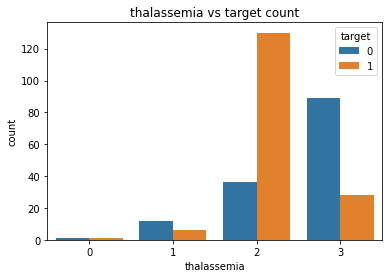

In [227]:
sns.countplot(data=df,x='thalassemia',hue='target')
plt.title('thalassemia vs target count')

<AxesSubplot:xlabel='chest pain', ylabel='count'>

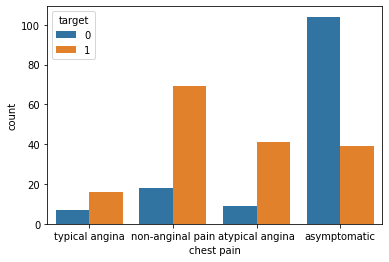

In [136]:
sns.countplot(x='chest pain',data=df,hue='target')

Text(0.5, 1.0, 'cholestoral vs target in sex')

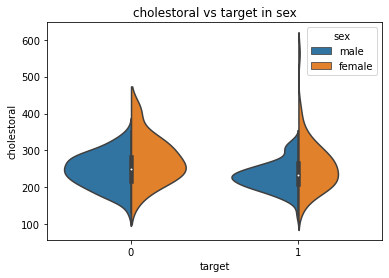

In [211]:
sns.violinplot(x='target',y='cholestoral',data=df,hue='sex',split=True)
plt.title('cholestoral vs target in sex')

Text(0.5, 1.0, 'target vs BP between sex')

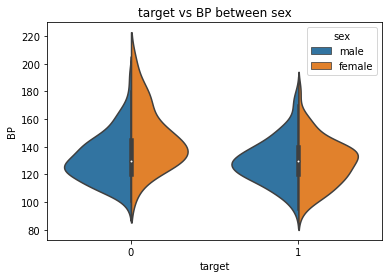

In [212]:
sns.violinplot(x='target',y='BP',data=df,hue='sex',split=True)
plt.title('target vs BP between sex')

Text(0.5, 1.0, 'target vs age')

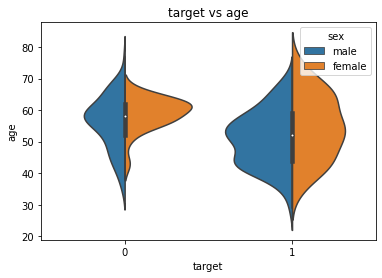

In [213]:
sns.violinplot(x='target',y='age',data=df,hue='sex',split=True)
plt.title('target vs age')

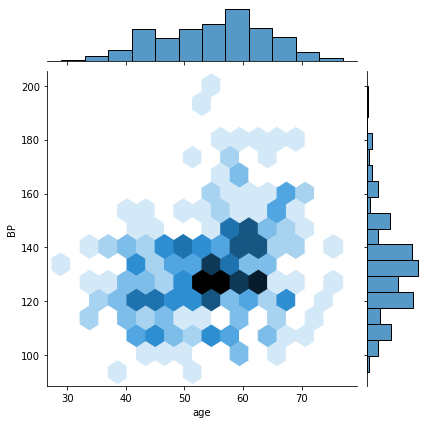

In [215]:
sns.jointplot(x='age',y='BP',data=df,kind='hex')

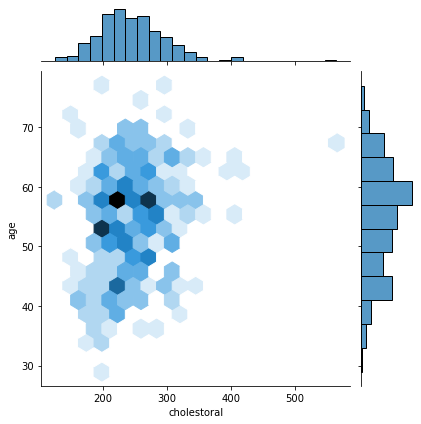

In [164]:
sns.jointplot(x='cholestoral',y='age',data=df,kind='hex')

In [173]:
df[(df['target']==1)& (df['sex']=='female')]['age'].mean()

54.55555555555556

Text(0.5, 1.0, 'cholestoral vs BP')

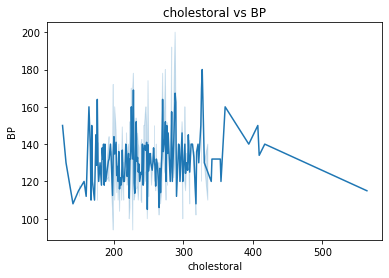

In [216]:
sns.lineplot(data=df,x='cholestoral',y='BP')
plt.title('cholestoral vs BP')

Text(0.5, 1.0, 'age vs BP')

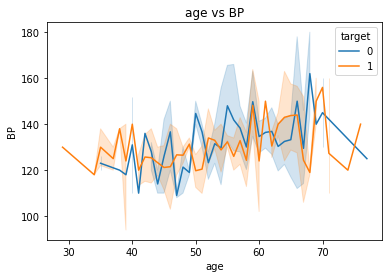

In [218]:
sns.lineplot(data=df,x='age',y='BP',hue='target')
plt.title('age vs BP')

Text(0.5, 1.0, 'target vs age')

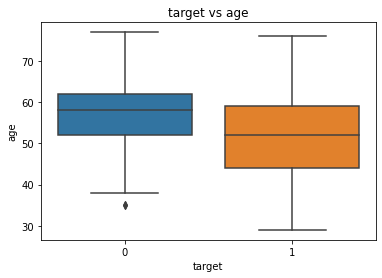

In [219]:
sns.boxplot(x='target',y='age',data=df)
plt.title('target vs age')

Text(0.5, 1.0, 'chest pain vs max heart rate')

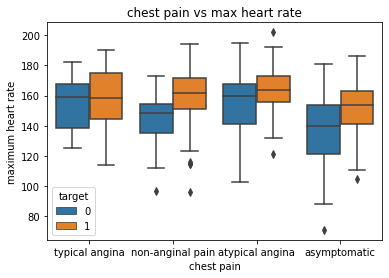

In [220]:
sns.boxplot(x='chest pain',y='maximum heart rate',data=df,hue='target')
plt.title('chest pain vs max heart rate')

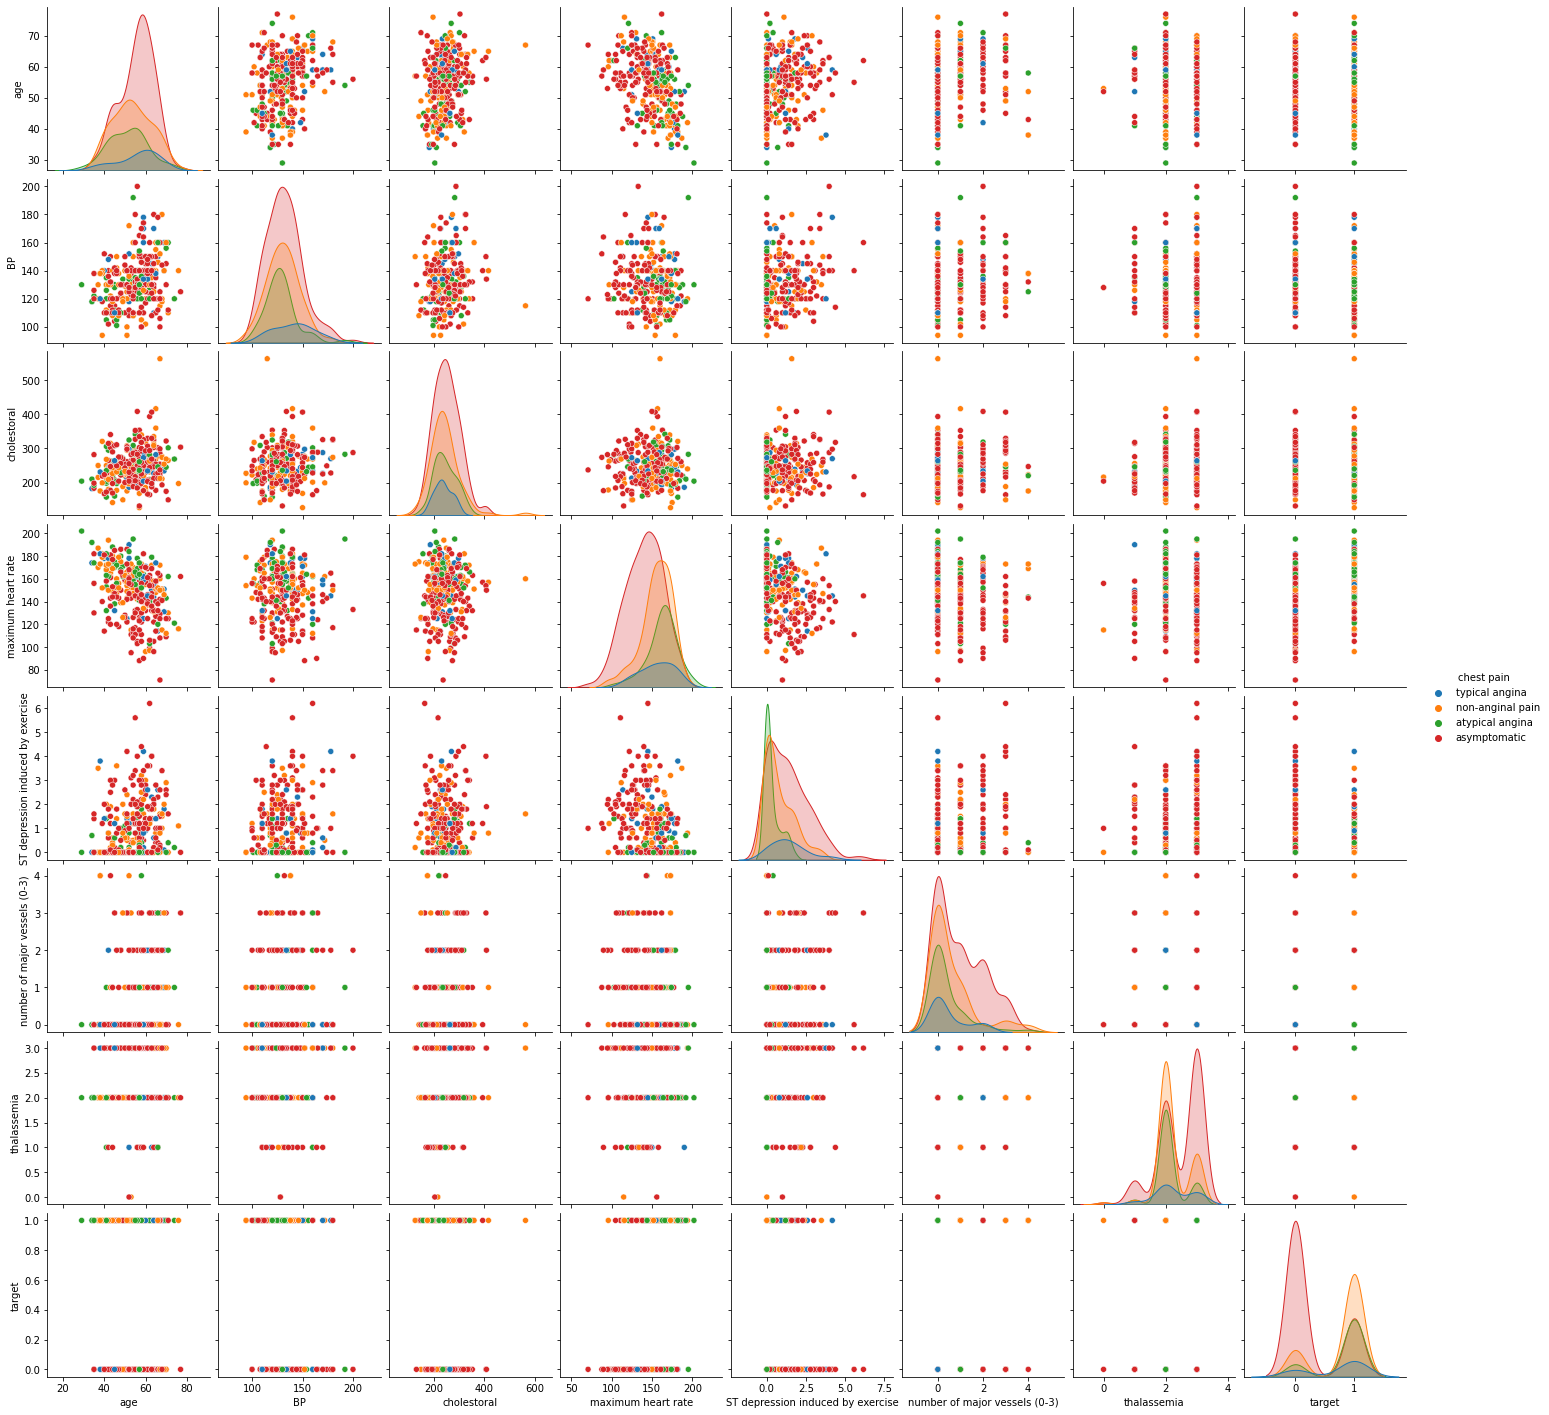

In [231]:
sns.pairplot(data=df,hue='chest pain')